# Visualisation of Pokemon

The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [archive](https://seaborn.pydata.org/archive.html).  Check your Seaborn version below.

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [140]:
# see what version of Seaborn you have installed so you can find the right documentation
sns.__version__

'0.11.1'

In [141]:
# Read dataset
df = pd.read_csv('files/Pokemon.csv', index_col=0)

In [142]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now step through the examples in the tutorial to learn a little about the plot methods available in Seaborn.  

(0.0, 140.45)

<Figure size 1440x360 with 0 Axes>

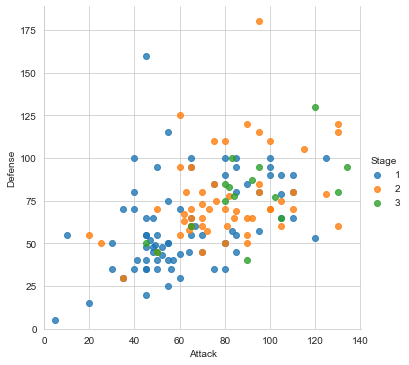

In [143]:
plt.figure(figsize=(20,5))
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')   
plt.ylim(0, None)
plt.xlim(0, None)

<AxesSubplot:>

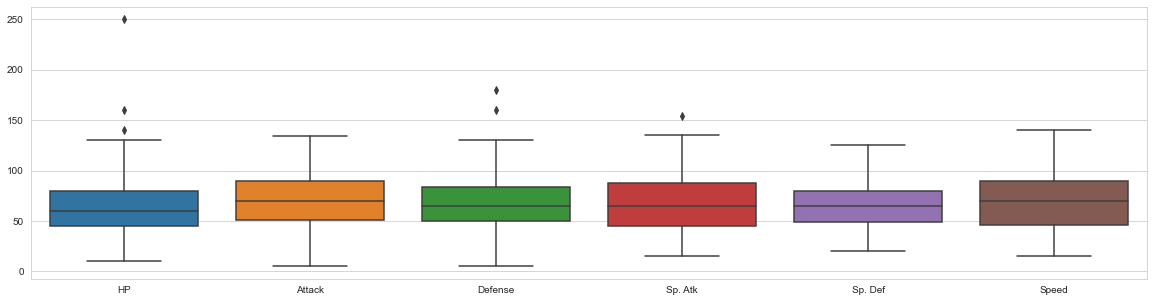

In [144]:
plt.figure(figsize=(20,5))
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis = 1)
sns.boxplot(data=stats_df)

In [145]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

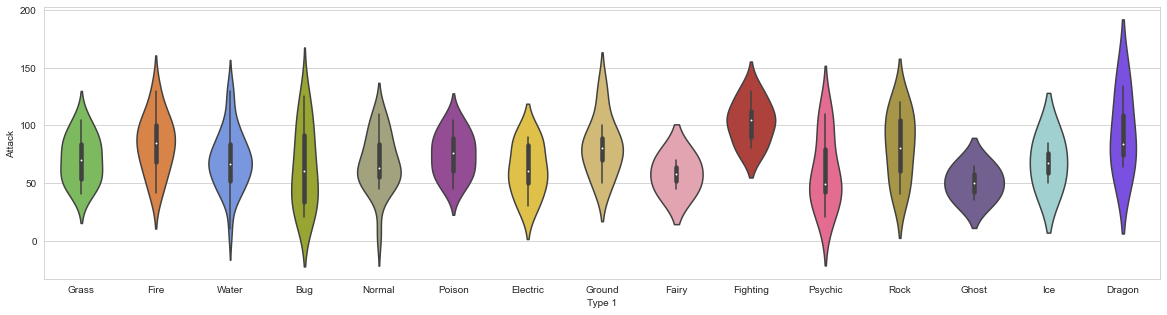

In [146]:
plt.figure(figsize=(20,5))
sns.violinplot(x = 'Type 1', y = 'Attack', data = df,
              palette = pkmn_type_colors)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

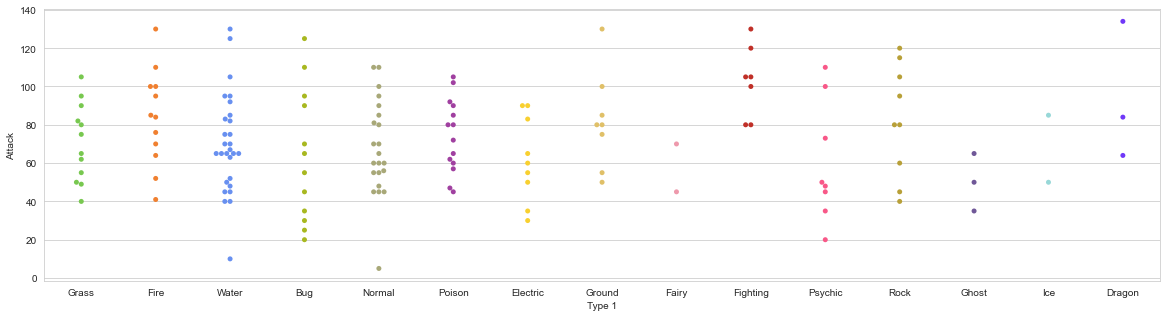

In [147]:
plt.figure(figsize=(20,5))
sns.swarmplot(x = 'Type 1', y = 'Attack', data = df,
              palette = pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

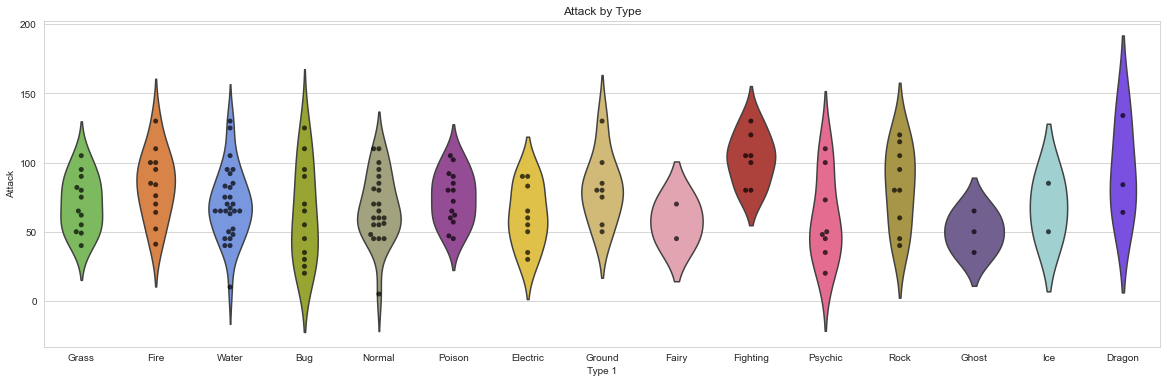

In [148]:
plt.figure(figsize=(20,6))

sns.violinplot(x = 'Type 1',
               y = 'Attack',
               data = df,
               inner = None,
                palette = pkmn_type_colors)

sns.swarmplot(x = 'Type 1',
             y = 'Attack',
             data = df,
             color = 'k',
             alpha = 0.7)

plt.title('Attack by Type')

In [149]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [150]:
melted_df = pd.melt(stats_df,
                    id_vars = ["Name", "Type 1", "Type 2"],
                   var_name = "Stat")
melted_df.head()

print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


C:\Users\Signature\anaconda3\lib\site-packages\seaborn\categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\Signature\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Signature\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Signature\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Signature\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to

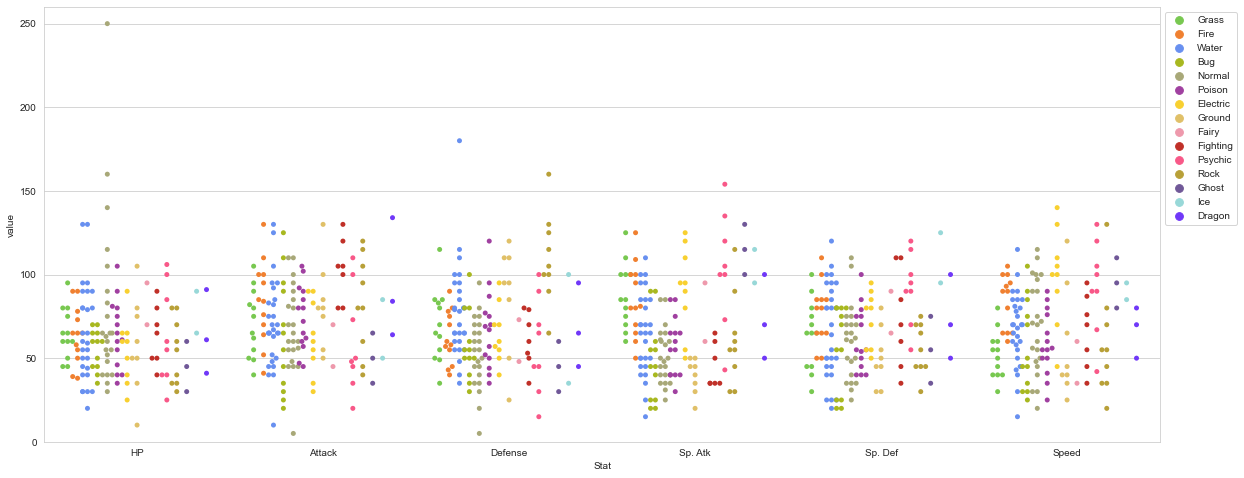

In [151]:
plt.figure(figsize=(20,8))



sns.swarmplot(x = 'Stat',
              y = 'value', 
              data = melted_df,
              hue = 'Type 1',
             split = True,
             palette = pkmn_type_colors)

plt.ylim(0, 260)

plt.legend(bbox_to_anchor = (1, 1), loc = 2)

<AxesSubplot:>

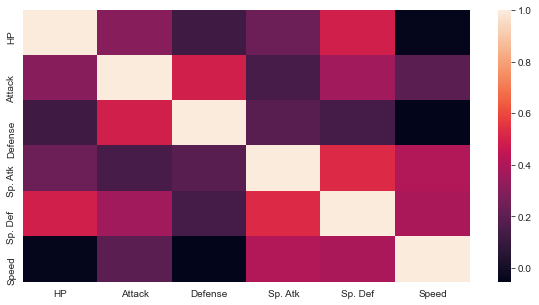

In [152]:
plt.figure(figsize=(10,5))
corr = stats_df.corr()

sns.heatmap(corr)

C:\Users\Signature\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attack', ylabel='Density'>

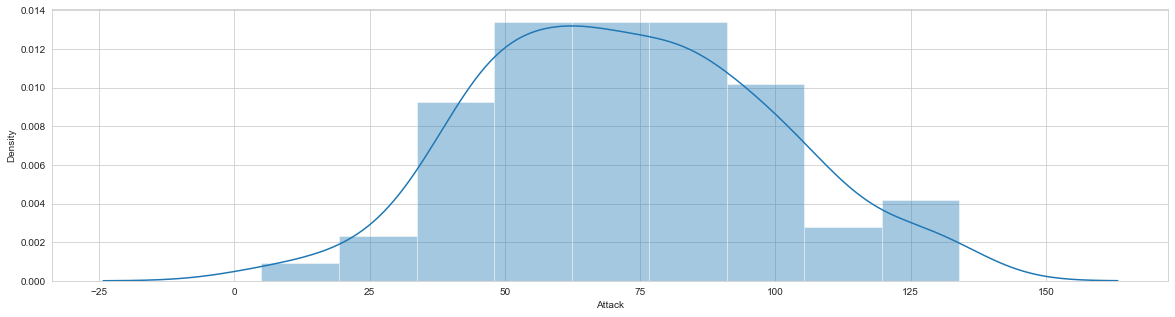

In [153]:
plt.figure(figsize=(20,5))
sns.distplot(df.Attack)

NameError: name 'rotation' is not defined

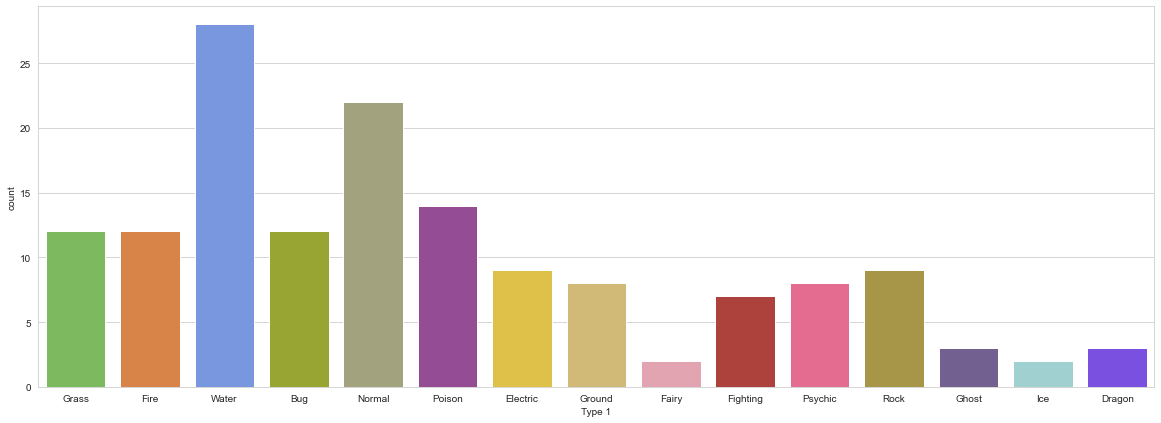

In [154]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'Type 1', data = df, palette=pkmn_type_colors)
plt.xticks(rotation == -45)

In [ ]:
g = sns.factorplot(x = 'Type 1',
                  y = 'Attack',
                  data = df,
                  hue = 'Stage',
                  col = 'Stage',
                  kind = 'swarm')

g.set_xticklabels(rotation = -45)

In [ ]:
sns.kdeplot(df.Attack, df.Defense)

In [ ]:
sns.jointplot(x='Attack', y='Defense', data=df)

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://seaborn.pydata.org/archive/0.10/tutorial/aesthetics.html#seaborn-figure-styles) on that for version 0.10.

C:\Users\Signature\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Speed for Pokemon')

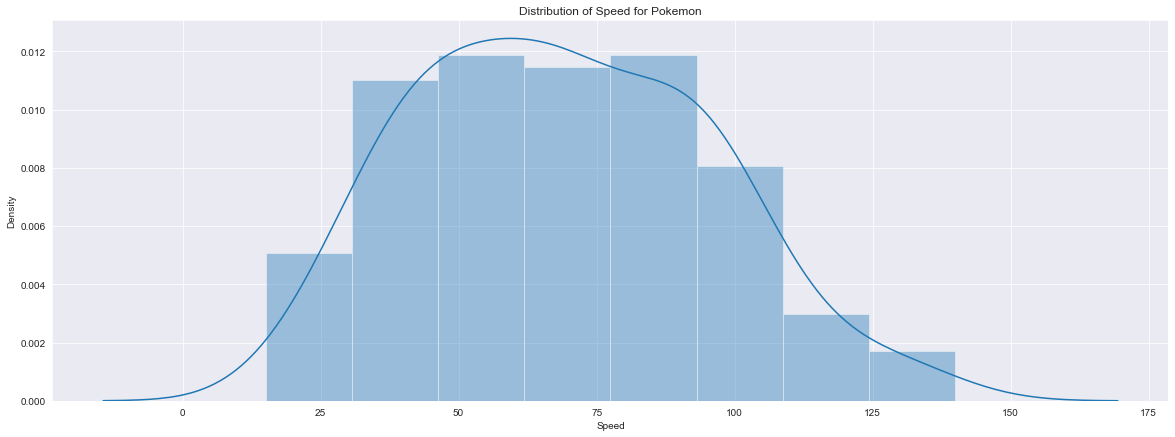

In [155]:
plt.figure(figsize=(20,7))
with sns.axes_style('darkgrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")

In [156]:
%matplotlib inline 